In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/no_null_paystack_checkout_transactions.csv')

In [4]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,4,success,NGN,NG,Nigeria
3,5,abandoned,NGN,NG,Nigeria
4,7,success,NGN,NG,Nigeria


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1961 non-null   int64 
 1   status        1961 non-null   object
 2   currency      1961 non-null   object
 3   country_code  1959 non-null   object
 4   country_name  1961 non-null   object
dtypes: int64(1), object(4)
memory usage: 76.7+ KB


In [6]:
df.isna().sum()

id              0
status          0
currency        0
country_code    2
country_name    0
dtype: int64

There are two missing values in the country_code column

In [7]:
df.shape

(1961, 5)

In [9]:
df.duplicated().sum()

0

No duplicate entry in our data

<AxesSubplot:>

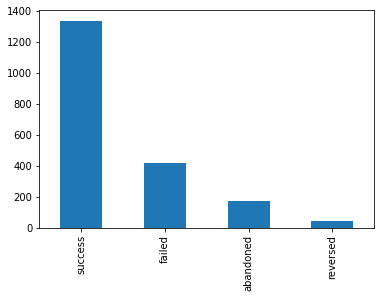

In [10]:
df['status'].value_counts().plot(kind='bar')

From the above graph, it can be seen that almost 1,400 subscriptions were successful, 
while over 400 failed, almost 200 were abandoned abd the rest were reversed.

<AxesSubplot:>

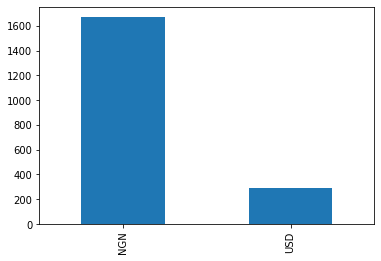

In [11]:
df['currency'].value_counts().plot(kind='bar')

From the above graph, it can be seen that over 1, 600 subscriptions was done in Naira, 
while over 200 were done in Dollar.

<AxesSubplot:>

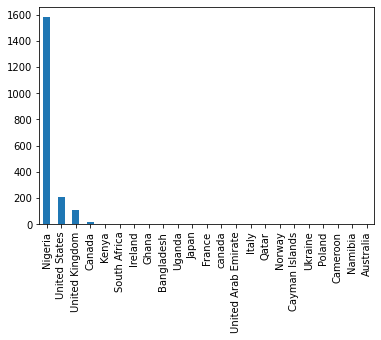

In [59]:
df['country_name'].value_counts().plot(kind='bar')

In [27]:
df2 = df.copy()

In [28]:
df2.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,4,success,NGN,NG,Nigeria
3,5,abandoned,NGN,NG,Nigeria
4,7,success,NGN,NG,Nigeria


In [29]:
# Drop id and country_code columns since they are not relevant to our analysis
df2.drop(['id'], axis=1, inplace=True)
#df2.drop(['id', 'country_code'], axis=1, inplace = True)

In [30]:
df2.head()

,status,currency,country_code,country_name
0,failed,USD,US,United States
1,success,NGN,NG,Nigeria
2,success,NGN,NG,Nigeria
3,abandoned,NGN,NG,Nigeria
4,success,NGN,NG,Nigeria


In [31]:
df2.status = np.where(df2.status == "success", 1, 0)
df2.status.value_counts()

1    1336
0     625
Name: status, dtype: int64

In [32]:
df2.isna().sum()

status          0
currency        0
country_code    2
country_name    0
dtype: int64

In [33]:
#Dropping unnecessary column
df2.drop(['country_code'], axis=1, inplace=True)

In [34]:
df2.head()

,status,currency,country_name
0,0,USD,United States
1,1,NGN,Nigeria
2,1,NGN,Nigeria
3,0,NGN,Nigeria
4,1,NGN,Nigeria


In [35]:
df2.isna().sum()

status          0
currency        0
country_name    0
dtype: int64

No missing values anymore.

In [38]:
df2.head()

,status,currency,country_name
0,0,USD,United States
1,1,NGN,Nigeria
2,1,NGN,Nigeria
3,0,NGN,Nigeria
4,1,NGN,Nigeria


In [39]:
df.groupby(['currency', 'country_name']).status.value_counts(normalize=True)

currency  country_name         status   
NGN       Australia            failed       1.000000
          Bangladesh           failed       1.000000
          Canada               failed       0.625000
                               success      0.375000
          France               success      1.000000
          Ghana                success      0.666667
                               abandoned    0.333333
          Ireland              success      1.000000
          Nigeria              success      0.739691
                               failed       0.173969
                               abandoned    0.063789
                               reversed     0.022552
          Norway               success      1.000000
          South Africa         abandoned    0.500000
                               success      0.500000
          Uganda               success      0.666667
                               reversed     0.333333
          United Kingdom       success      0.560000
     

<AxesSubplot:xlabel='currency,country_name,status'>

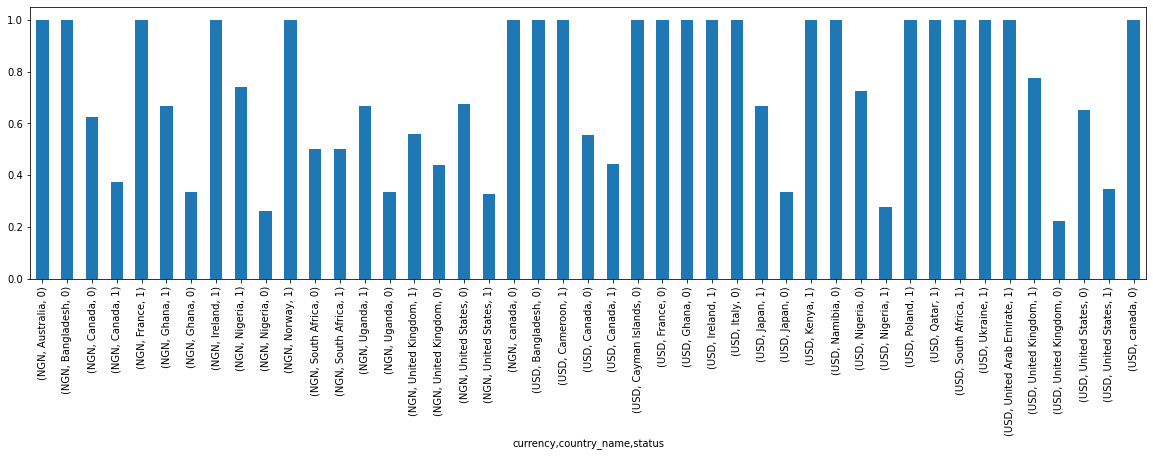

In [61]:
df2.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

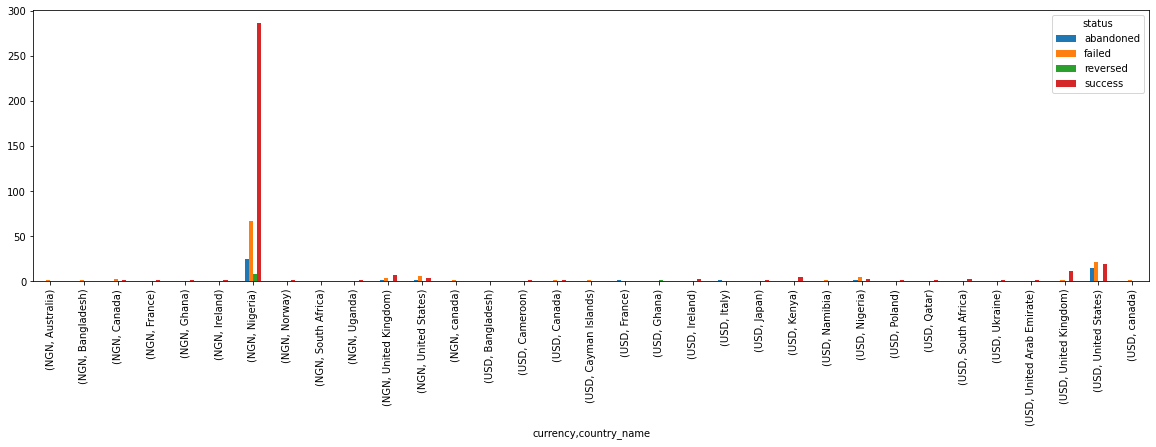

In [62]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

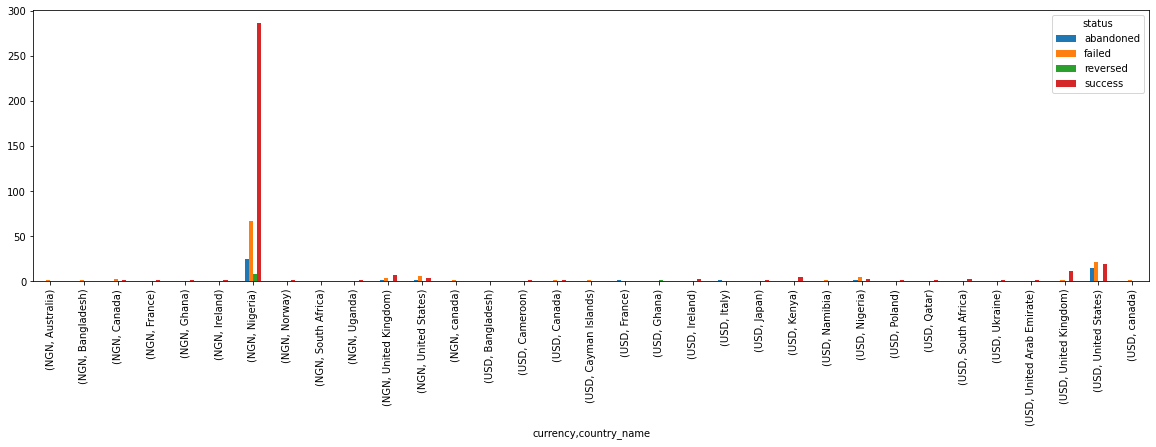

In [41]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='status,currency,country_name'>

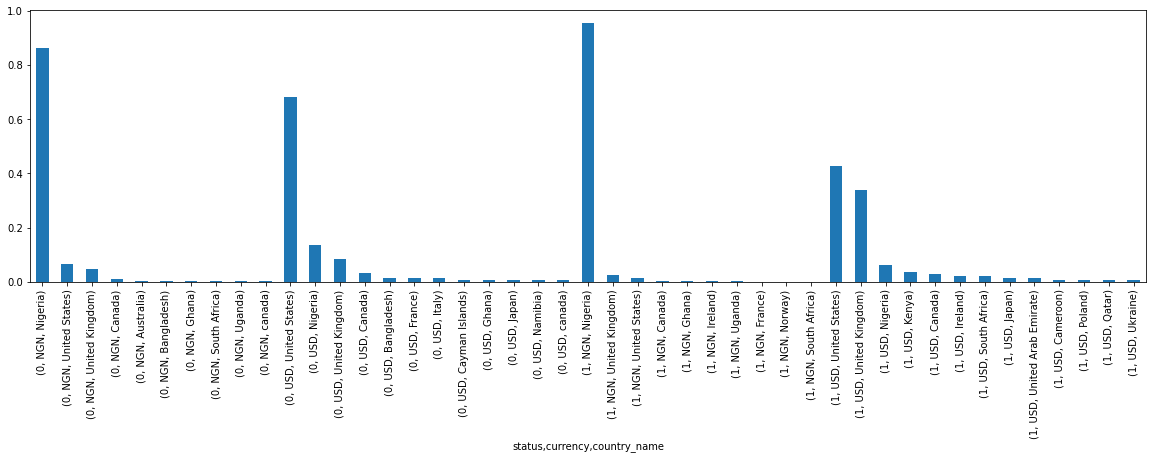

In [43]:
df2.groupby(['status', 'currency']).country_name.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name,status'>

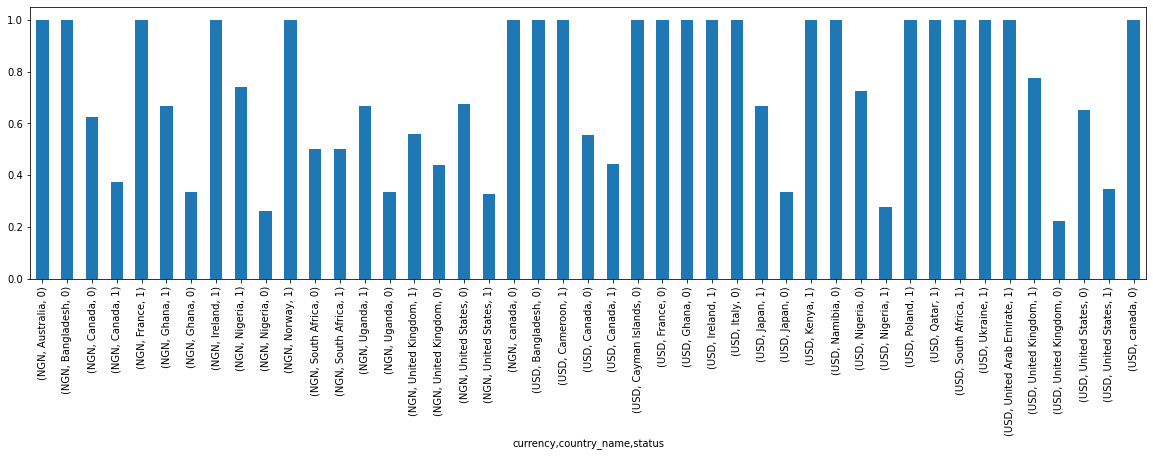

In [44]:
df2.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name,status'>

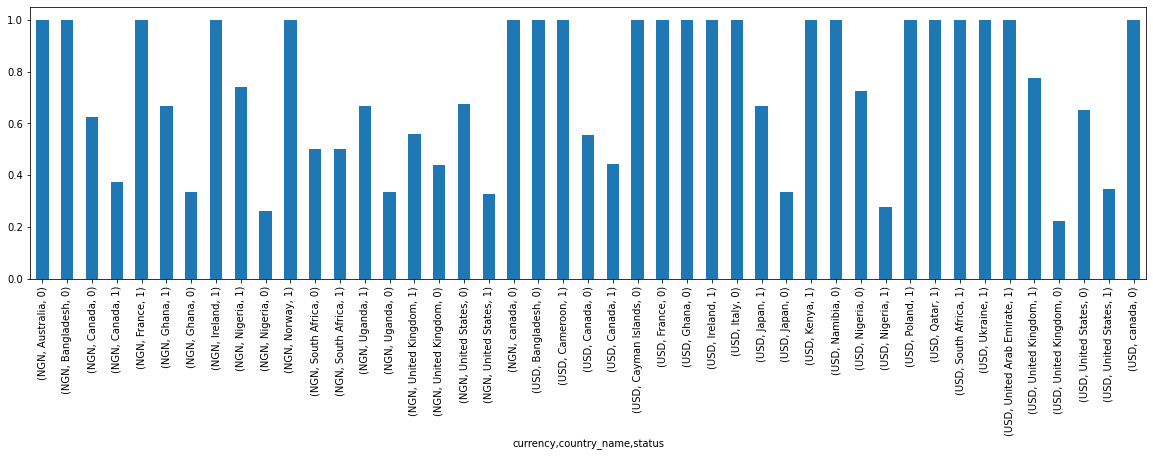

In [48]:
df2.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,status'>

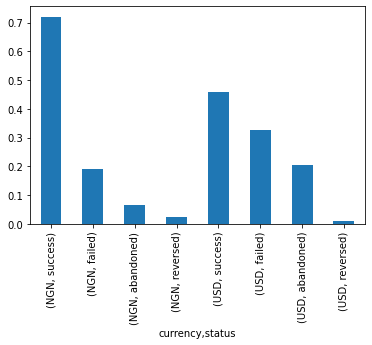

In [52]:
df.groupby('currency').status.value_counts(normalize=True).plot(kind='bar')

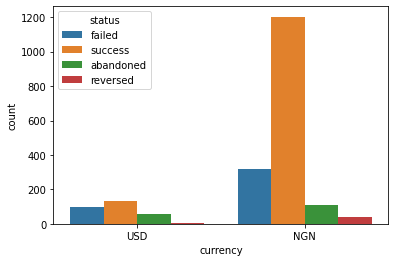

In [55]:
sns.countplot(x=df['currency'], hue=df['status']);

<AxesSubplot:xlabel='country_name,currency'>

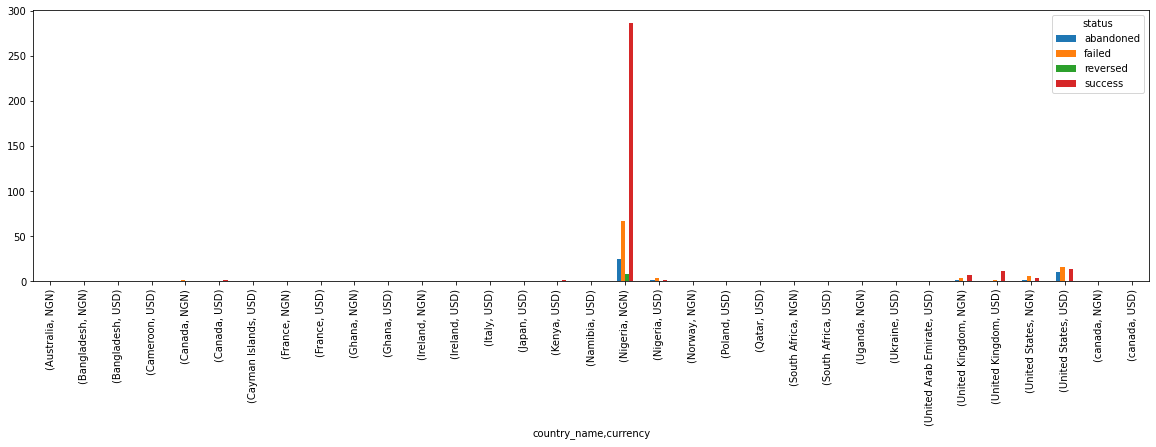

In [58]:
df.groupby(["country_name", "currency", "status"]).size().unstack().fillna(0).apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [63]:
df.status.value_counts()

success      1336
failed        415
abandoned     169
reversed       41
Name: status, dtype: int64

In [64]:
df.country_name.value_counts()

Nigeria                1581
United States           210
United Kingdom          108
Canada                   17
Kenya                     5
South Africa              5
Ireland                   5
Ghana                     4
Bangladesh                3
Uganda                    3
Japan                     3
France                    3
canada                    2
United Arab Emirate       2
Italy                     2
Qatar                     1
Norway                    1
Cayman Islands            1
Ukraine                   1
Poland                    1
Cameroon                  1
Namibia                   1
Australia                 1
Name: country_name, dtype: int64

In [66]:
df.currency.value_counts()

NGN    1671
USD     290
Name: currency, dtype: int64

In [ ]:
# A functionthat finds the median of the values it receives
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n%2] if n else None

values = [1, 2, 6]
print(median(values))

In [ ]:
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return np.median([s])

values = [1, 2, 6]
print(median(values))

In [ ]:
students = [("Allen Anderson", "Computer Science"),
            ("Edgar Einstein", "Engineering"),
            ("Farrah Finn", "Fine Arts")]
     

def add_new_student(students, name, major):
    students.append((name, major))

def update_student(students, index, name, major):
    students[index] = (name, major)

def find_students_by_name(students, name):
    return [student for student in students if name in student[0]]

def get_all_majors(students):
    return [student[1] for student in students]


In [ ]:
"""
Implement a group_by_owners function that:

Accepts a dictionary containing the file owner name for each file name.
Returns a dictionary containing a list of file names for each owner name, in any order.
For example, for dictionary {'Input.txt': 'Randy', 'Code.py': 'Stan', 'Output.txt': 'Randy'} the group_by_owners function should return {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}.


def group_by_owners(files):
    return None

if __name__ == "__main__":    
    files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
    print(group_by_owners(files))
"""

from collections import defaultdict


def group_by_owners(files):
    owners = defaultdict(list)
    for file, owner in files.items():
        owners[owner].append(file)
    return owners


files = {
    'Input.txt': 'Randy',
    'Code.py': 'Stan',
    'Output.txt': 'Randy'
}
print(group_by_owners(files))